# Statistical Pattern Recognition Lab Assignment 1

# Q1



In [1]:
import matplotlib.pyplot as plt
import numpy as np

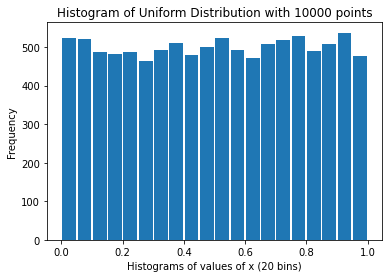

In [34]:
#Uniform Distribution
num_pts = 10000                     # Vary accordingly
s = np.random.uniform(0,1,num_pts)
plt.hist(s, bins = 20, rwidth=0.9)
plt.xlabel('Histograms of values of x (20 bins)')
plt.ylabel('Frequency')
plt.title('Histogram of Uniform Distribution with '+str(num_pts)+' points')
#plt.legend()
plt.show()

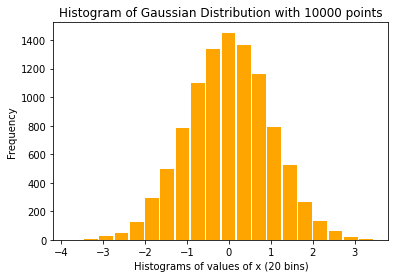

In [40]:
#Gaussian/Normal distribution
num_pts = 10000             # Vary accordingly
s = np.random.normal(0.0,1.0,num_pts)
plt.hist(s, bins = 20, rwidth=0.9, color='orange')
plt.xlabel('Histograms of values of x (20 bins)')
plt.ylabel('Frequency')
plt.title('Histogram of Gaussian Distribution with '+str(num_pts)+' points')
#plt.legend()
plt.show()

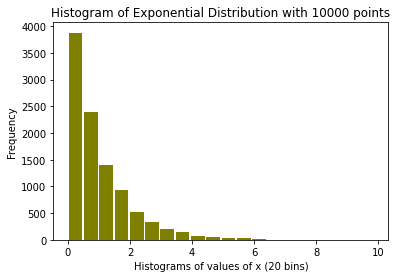

In [47]:
#Exponential distribution
num_pts = 10000         # Vary accordingly
s = np.random.exponential(1.0,num_pts)
plt.hist(s, bins = 20, rwidth=0.9, color='olive')
plt.xlabel('Histograms of values of x (20 bins)')
plt.ylabel('Frequency')
plt.title('Histogram of Exponential Distribution with '+str(num_pts)+' points')
#plt.legend()
plt.show()

# Question 2

In [85]:
def Q2(n_arr = [2,3,5]):
  out_probabilities = []
  for n in n_arr:
    num_expt = 100000
    positive_test = 0
    for test in range(num_expt): 
      num_pts = n                           #  n which we are testing. num_pts will equal 2,3 and 5 
      s = np.random.uniform(0,360,num_pts)  # Randomly choosing points on the unit circle with angles ranging from 0 to 360
      s.sort()                        
      
      diff = []                             # Storing the angle subtended by the consecutive points with the center of the circle
      
      for i,angle in enumerate(s):
          diff.append(s[i] - s[i-1])
          if diff[i] < 0:
            diff[i] = diff[i] + 360         # Rescaling negative angles back to 0 to 360 degrees 

    #Checking if any angle subtended is more than 180 degrees
    #If yes than all the points lie in a single semicircle
      for i in diff:              
        if i>180:
          positive_test += 1
          break

    #Printing the ratio of positive test cases and total no. of experiments
    out_probabilities.append(positive_test/num_expt)
  
  return(out_probabilities)
      

In [86]:
print(Q2([2,3,5]))

[1.0, 0.74983, 0.31165]


As expected by the formula n/2^(n-1), our outputs are close to the analytical answeres of 1.0, 0.75 & 0.3125

In [87]:
n_arr = [2,3,4,5,6,7,8,9,10,11]
out = Q2(n_arr)

In [92]:
analytical_func = lambda n: n/(2**(n-1))
ana_out = [analytical_func(i) for i in n_arr]

In [135]:
print(out)
print(ana_out)

[1.0, 0.75039, 0.49768, 0.31058, 0.18871, 0.10938, 0.06335, 0.03523, 0.01933, 0.01018]
[1.0, 0.75, 0.5, 0.3125, 0.1875, 0.109375, 0.0625, 0.03515625, 0.01953125, 0.0107421875]


In [136]:
print([out[i] - ana_out[i] for i,x in enumerate(n_arr)])

[0.0, 0.00039000000000000146, -0.0023199999999999887, -0.0019199999999999773, 0.0012099999999999889, 5.0000000000050004e-06, 0.0008500000000000035, 7.374999999999743e-05, -0.00020125000000000004, -0.0005621875000000002]


## Question 3

In [106]:
import scipy.stats as stats
import math

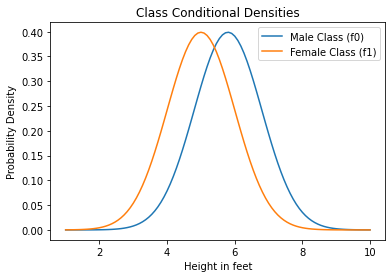

In [123]:
mu1 = 5.8
mu2 = 5.0
sigma1 = 1
sigma2 = 1

male_class = stats.norm(mu1, sigma1)
female_class = stats.norm(mu2, sigma2)
x = np.linspace(1, 10, 100)
plt.plot(x, male_class.pdf(x), label = "Male Class (f0)")
plt.plot(x, female_class.pdf(x), label = "Female Class (f1)")
plt.xlabel('Height in feet')
plt.ylabel('Probability Density')
plt.title('Class Conditional Densities')
plt.legend()
plt.show()

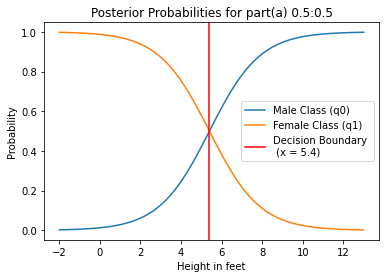

In [195]:
mu1 = 5.8
mu2 = 5.0
sigma1 = 1
sigma2 = 1
p0 = 0.5
p1 = 0.5


male_class = stats.norm(mu1, sigma1)
female_class = stats.norm(mu2, sigma2)

q0 = lambda x : p0 * male_class.pdf(x)    /  ( p0 * male_class.pdf(x) + p1 * female_class.pdf(x) )
q1 = lambda x : p1 * female_class.pdf(x)  /  ( p0 * male_class.pdf(x) + p1 * female_class.pdf(x) )

x = np.linspace(-2, 13, 100)
plt.plot(x, q0(x), label = "Male Class (q0)")
plt.plot(x, q1(x), label = "Female Class (q1)")
plt.axvline(x=5.4, color = 'red', label = 'Decision Boundary \n (x = 5.4)')
plt.xlabel('Height in feet')
plt.ylabel('Probability')
plt.title('Posterior Probabilities for part(a) 0.5:0.5')
plt.legend()
plt.show()

In [196]:
#Calculating missclassification error
import scipy.integrate as integrate

In [197]:
male_missclass = integrate.quad(lambda x: male_class.pdf(x), -np.inf, 5.4)[0]
female_missclass = integrate.quad(lambda x: female_class.pdf(x), 5.4, np.inf)[0]
#print(male_missclass, female_missclass)
total_error = p0 * male_missclass + p1 * female_missclass
print("Missclassification error for bayes classifier in part a is " , total_error)

Missclassification error for bayes classifier in part a is  0.34457825838967593


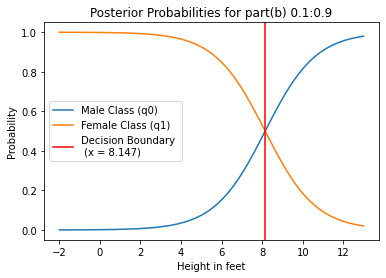

In [198]:
mu1 = 5.8
mu2 = 5.0
sigma1 = 1
sigma2 = 1
p0 = 0.1
p1 = 0.9


male_class = stats.norm(mu1, sigma1)
female_class = stats.norm(mu2, sigma2)

q0 = lambda x : p0 * male_class.pdf(x)    /  ( p0 * male_class.pdf(x) + p1 * female_class.pdf(x) )
q1 = lambda x : p1 * female_class.pdf(x)  /  ( p0 * male_class.pdf(x) + p1 * female_class.pdf(x) )

x = np.linspace(-2, 13, 100)
plt.plot(x, q0(x), label = "Male Class (q0)")
plt.plot(x, q1(x), label = "Female Class (q1)")
plt.axvline(x=8.147, color = 'red', label = 'Decision Boundary \n (x = 8.147)')
plt.xlabel('Height in feet')
plt.ylabel('Probability')
plt.title('Posterior Probabilities for part(b) 0.1:0.9')
plt.legend()
plt.show()

In [199]:
#Finding the best x where q0(x) and q1(x) are almost equal. This will be our boundary.
a = np.linspace(8, 9, 1001)
boundary = 0
diff_bound = 100
for i in a:
  if abs(q0(i)-q1(i)) < diff_bound:
    boundary = i
    diff_bound = abs(q0(i)-q1(i))
print("Boundary for part b is " , boundary) 

Boundary for part b is  8.147


In [200]:
import scipy.integrate as integrate

In [206]:
male_missclass = integrate.quad(lambda x: male_class.pdf(x), -np.inf, boundary)[0]
female_missclass = integrate.quad(lambda x: female_class.pdf(x), boundary, np.inf)[0]
#print(male_missclass, female_missclass)
total_error = p0 * male_missclass + p1 * female_missclass
print("Missclassification error for bayes classifier in part b is " , total_error)

Missclassification error for bayes classifier in part b is  0.09979603458907794


In [204]:
male_missclass

0.9905373726090136

In [205]:
female_missclass

0.0008247748090850805

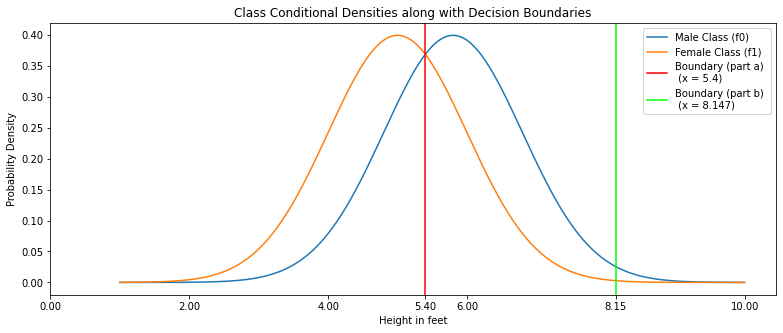

In [222]:
mu1 = 5.8
mu2 = 5.0
sigma1 = 1
sigma2 = 1

male_class = stats.norm(mu1, sigma1)
female_class = stats.norm(mu2, sigma2)
x = np.linspace(1, 10, 1000)
plt.figure(figsize=(13,5))
plt.plot(x, male_class.pdf(x), label = "Male Class (f0)")
plt.plot(x, female_class.pdf(x), label = "Female Class (f1)")
plt.xticks([0, 2, 4, 5.4, 6, 8.147, 10])
plt.axvline(x=5.4, color = 'red', label = 'Boundary (part a) \n (x = 5.4)')
plt.axvline(x=8.147, color = 'lime', label = 'Boundary (part b) \n (x = 8.147)')

plt.xlabel('Height in feet')
plt.ylabel('Probability Density')
plt.title('Class Conditional Densities along with Decision Boundaries')
plt.legend()
plt.show()